# Exercise 2 

Exercise 2 includes four problems that you need to solve with programming, and by providing answers to questions. For each problem you need to modify the notebook by adding your own solutions. Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).

### Time allocation

**Completing this exercise takes approximately: 6-10 hours** (based on previous year statistics). However, the time it takes can vary significantly from student to student, so we recommended that you start immediately working on the exercise to avoid issues meeting with the deadline.  

### Due date

You should submit (push) your Exercise answers to your personal Github repository **~2.5 weeks after the release of the Exercise (i.e. submit by 23:59 on Sunday 19th November)**. 
      
### Start your exercise in CSC Notebooks

Before you can start programming, you need to launch the CSC Notebook instance and clone your **personal copy of the Exercise repository** (i.e. something like `exercise-2-htenkanen`) there using Git. If you need help with this, [read the documentation on the course site](https://spatial-analytics.readthedocs.io/en/latest/lessons/L1/git-basics.html).

### Working with Jupyter Notebooks

Jupyter Notebooks are documents that can be used and run inside the JupyterLab programming environment (e.g. at [notebooks.csc.fi](https://notebooks.csc.fi/)) containing the computer code and rich text elements (such as text, figures, tables and links). 

**A couple of hints**:

- You can **execute a cell** by clicking a given cell that you want to run and pressing <kbd>Shift</kbd> + <kbd>Enter</kbd> (or by clicking the "Play" button on top)
- You can **change the cell-type** between `Markdown` (for writing text) and `Code` (for writing/executing code) from the dropdown menu above. 

See [**further details and help from here**](https://pythongis.org/part1/chapter-01/nb/04-using-jupyterlab.html). 

### Hints

If there are general questions arising from this exercise, we will add hints to the course website under [Exercise 2 description](https://spatial-analytics.readthedocs.io/en/latest/lessons/L2/exercise-2.html).

## Problem 1: Prepare and explore the data (7 points)

*Implementing these successfully gives you 5.5 of the points allocated for problem 1*:

Next, you will study areal data describing the population distribution in Helsinki Region. The data is provided by Statistics Finland. We will obtain the data using the WFS API of Statistics Finland, which is handy because we can directly read the data into geopandas by passing a special request call to it (which we provide below). 


1. Download the data from Statistics Finland into a GeoDataFrame using the `gpd.read_file()` function

2. Create a subset of the data by selecting municipalities for Helsinki Region (i.e. "kunta" with values "091", "049", "092" and "235"). 
   - ***Hint***: You can do this by combining the `.loc[]` indexing with `.isin()` query as demonstrated in [this tutorial from pythongis.org](https://pythongis.org/part1/chapter-03/nb/01-data-manipulation.html#selections-using-listed-criteria).

3. Reset the index using `data.reset_index(drop=True)` which will ensure that the index values in your data increase sequentially starting from 0.

3. Drop all other columns except "geometry", "pt_vakiy" and "postinumeroalue" (postal code) --> i.e. select those columns from the data (check [Geo-Python course](https://geo-python-site.readthedocs.io/en/latest/notebooks/L5/exploring-data-using-pandas.html#selecting-columns) for help).

4. Calculate the population density into a column `"pop_density_km2"` for each postal code (pop per square kilometer). Notice, that after the reprojection, the geometrical units are represented as meters.

5. Create an interactive map showing the population density in Helsinki Region. For doing the interactive map, you can use a method `data.explore("pop_density_km2"`). As a result, you should get something like below:

![Helsinki Region Population density](img/helsinki_pop_density.png)




In [19]:
!pip3 install folium
!pip3 install libpysal
!pip3 install mapclassify
!pip3 install pysal

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 41 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 132 kB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 1.6 MB/s  eta 0:00:01
     |███████████████████

In [7]:
import geopandas as gpd

# URL for postal code level data from Statistics Finland
data_url = "http://geo.stat.fi/geoserver/postialue/wfs?request=GetFeature&typename=postialue:pno_tilasto_2020&outputformat=JSON"

# Read the data into a GeoDataFrame
postal_code_data = gpd.read_file(data_url)

# Select municipalities for Helsinki Region (091, 049, 092, 235)
helsinki_region_data = postal_code_data.loc[postal_code_data['kunta'].isin(['091', '049', '092', '235'])]

# Reset the index
helsinki_region_data = helsinki_region_data.reset_index(drop=True)

# Drop all other columns except "geometry", "pt_vakiy", and "postinumeroalue"
helsinki_region_data = helsinki_region_data[['geometry', 'pt_vakiy', 'postinumeroalue']]

# Calculate the population density (population per square kilometer)
# Convert area from square meters to square kilometers
helsinki_region_data['pop_density_km2'] = helsinki_region_data['pt_vakiy'] / (helsinki_region_data.geometry.area / 10**6)

# Create an interactive map showing the population density
map_for_helsinki = helsinki_region_data.explore(column='pop_density_km2', legend=True)
# To display map
map_for_helsinki

### Questions

*Correct answers gives you 1.5 points allocated to problem 1*.

Use programming to find out the answers for the first two questions:

 - Question 1.1: Which postal code area has the **highest** population density? How many people per square kilometer there are?
 - Question 1.2: Which postal code area has the **lowest** population density? How many people per square kilometer there are?
 - Question 1.3: Why is it important to use population density instead of the original population count in the analysis? Describe.

### Answers

Answer to the questions by adding text after the `Answer` bullet points below:

#### Answer 1.1

In [17]:
# Calculate the population density (population per square kilometer) , Convert area from square meters to square kilometers
helsinki_region_data['pop_density_km2'] = helsinki_region_data['pt_vakiy'] / (helsinki_region_data.geometry.area / 10**6)

# Find the postal code area with the highest population density

highest_density = helsinki_region_data.loc[helsinki_region_data['pop_density_km2'].idxmax()]

highest_density

# Displaying the results
print(f"The postal code area with the highest population density {highest_density['postinumeroalue']} and a density of {highest_density['pop_density_km2']} people per square kilometer.")

The postal code area with the highest population density 00500 and a density of 21562.77810477085 people per square kilometer.


#### Answer 1.2

In [16]:
# Calculate the population density (population per square kilometer) , Convert area from square meters to square kilometers
helsinki_region_data['pop_density_km2'] = helsinki_region_data['pt_vakiy'] / (helsinki_region_data.geometry.area / 10**6)

# Find the postal code area with the highest population density

highest_density = helsinki_region_data.loc[helsinki_region_data['pop_density_km2'].idxmin()]

highest_density

# Displaying the results
print(f"The postal code area with the highest population density {highest_density['postinumeroalue']} and a density of {highest_density['pop_density_km2']} people per square kilometer.")

The postal code area with the highest population density 01770 and a density of 0.0 people per square kilometer.


#### Answer 1.3

Population density is crucial as it indicates the level of crowding in an area. Rather than solely revealing the population count, it communicates the number of people within a specific space. This information is pivotal for assessing whether an area is excessively congested or has sufficient capacity for additional residents. The utility of population density extends to urban planning, aiding in the strategic allocation of resources for essential amenities such as schools, parks, and roads. By considering the spatial concentration of people, planners can ensure that infrastructure developments align with the community's needs, optimizing space and resources to accommodate the population effectively.

## Problem 2: Investigate spatial autocorrelation (8 points)

### Coding 

*Implementing these successfully gives you 4 points allocated for problem 2*:

1. Create spatial weights based on how the boundaries of our postal code areas touch each other. Create the weights based on the data GeoDataFrame using **Queen contiguity** and store the resulting weights into a variable `w`. For creating the spatial weights, you can use the `weights` submodule from pysal library (see [docs](https://pysal.org/libpysal/generated/libpysal.weights.Queen.html#libpysal-weights-queen)). If you need further information, we also recommend checking [chapter 4](https://geographicdata.science/book/notebooks/04_spatial_weights.html) from "Geographic Data Science with Python" book (Rey et al. 2023). 

2. Drop possible islands by using a pandas method `.drop()` (see [docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)). For the sake of simplicity we just ignore the islands in our analysis. You can get the index values of the islands from the weights by calling `w.islands`. Then, reset the index of the GeoDataFrame, and recreate the weights using Queen contiguity (in a similar manner as in step 1). 

3. Row standardize the weights by using `w.transform` (without standardization, the spatial weights may merely reflect the number of neighbors an observation has).

4. Calculate the Moran's I based on the **population density** and using the spatial weights that we created in the previous step. For doing this, you can use the `Moran()` function from the pysal library, which accepts the Series of our population density column as one parameter and the weights as another, check the pysal docs for details. 

   - *Hint*: You can import the `Moran()` function as follows: `from esda.moran import Moran`.

5. What is the global Moran's I for our data? 

6. Create a Moran plot based on our data that allows us to investigate the spatial autocorrelation visually. For doing this, you can use a `plot_moran()` -function from pysal's splot submodule. 
   - *Hint*: You can import the `plot_moran()` function as follows: `from splot.esda import plot_moran`.
   - Sanity check: if everything is correct Moran plot should produce something like following (Moran's I value is hidden):

![Moran plot](img/Moran_plot.png)

In [20]:
# Importing modules
import geopandas as gpd
from libpysal.weights import Queen
from esda.moran import Moran
from splot.esda import plot_moran


Global Moran's I: 0.47784092425645047


/var/folders/g9/g70s402s44n2y_8xvk8bc42r0000gn/T/ipykernel_1531/514048392.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  spatial_weights = Queen.from_dataframe(helsinki_region_data)
/Users/safakamran/Library/Python/3.9/lib/python/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/var/folders/g9/g70s402s44n2y_8xvk8bc42r0000gn/T/ipykernel_1531/514048392.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  spatial_weights = Queen.from_dataframe(helsinki_region_data_no_islands)
/Users/safakamran/Library/Python/3.9/lib/python/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected 

(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.48', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.48)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

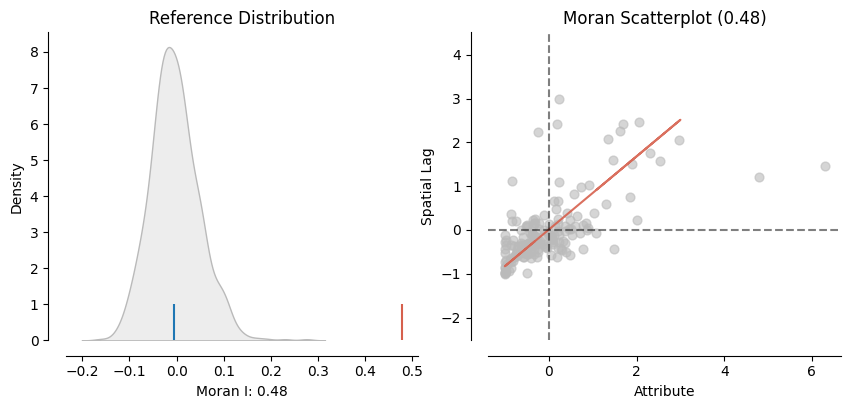

In [22]:
# Creating spatial weights based on Queen contiguity for 'helsinki_region_data' GeoDataFrame
spatial_weights = Queen.from_dataframe(helsinki_region_data)

# Drop islands and reset the index for 'helsinki_region_data'
helsinki_region_data_no_islands = helsinki_region_data.drop(spatial_weights.islands).reset_index(drop=True)
# Recreate the weights after dropping the islands
spatial_weights = Queen.from_dataframe(helsinki_region_data_no_islands)

# Row standardize the weights
spatial_weights.transform = 'R'

# alculate Moran's I for population density in 'helsinki_region_data_no_islands'
moran_i = Moran(helsinki_region_data_no_islands['pop_density_km2'], spatial_weights)

# 5. Print the global Moran's I value
print(f"Global Moran's I: {moran_i.I}")

# Create a Moran plot for 'helsinki_region_data_no_islands'
plot_moran(moran_i, zstandard=True, figsize=(10, 4))


### Questions 

*Correct answers gives you 4 points allocated to problem 2*.

  - Question 2.1: Why do we need to create spatial weights? For what purpose are they for?
  - Question 2.2: What happens to the spatial weights after row standardization?
  - Question 2.3: Why is it important/good to row standardize spatial weights?
  - Question 2.4: Based on the Moran's I value that you received for the Problem 2, is there spatial autocorrelation in the data? Is it positive or negative?
 - Question 2.5: What does the result mean? I.e. describe what the spatial autocorrelation indicates in this case? 
 - Question 2.6: Why is it important to understand whether your data is spatially autocorrelated (or not)?

### Answers

Answer to the questions by adding text after the `Answer` bullet point, below (hint: check the lecture materials/videos):

#### Answer 2.1

Spatial weights serve as a map of connections between locations, revealing the proximity and relationships among different areas. They are instrumental in gauging the similarity or influence between neighboring places. By illustrating how events in one location correlate with those in proximity, spatial weights assist in discerning spatial patterns. For instance, they can unveil the spread of a disease across neighborhoods or indicate if densely populated areas also attract more commercial establishments. In essence, spatial weights contribute crucial insights into the spatial dynamics of phenomena, enabling us to uncover and analyze geographical associations within datasets.

#### Answer 2.2

Row standardization of spatial weights redistributes influence uniformly across locations, mitigating biases introduced by varying neighbor counts. In its unstandardized form, areas with numerous neighbors exert more impact. However, through standardization, each area's influence is normalized, promoting equitable consideration irrespective of neighbor count. This fosters impartial comparisons in spatial relationship assessments, ensuring that results genuinely reflect similarities or differences between areas rather than being skewed by the number of connections. In essence, row standardization enhances the reliability of spatial analyses by providing a level playing field for all locations, facilitating more accurate and meaningful comparisons.

#### Answer 2.3

Row standardizing spatial weights holds significance as it guarantees equitable consideration for each study area, independent of its neighbor count. The absence of standardization could lead to disproportionate influence from areas with more neighbors, introducing potential bias into the analysis. Standardization ensures that the analysis accurately portrays the inherent characteristics of each area, rather than being disproportionately influenced by connectivity metrics. This practice enhances the precision and dependability of interpretations related to spatial relationships, aiding in the nuanced understanding of social phenomena or environmental patterns across diverse regions. In essence, row standardization fosters a balanced and unbiased assessment of spatial interactions, contributing to more meaningful insights.

#### Answer 2.4

The obtained Moran's I value of 0.48 indicates the presence of positive spatial autocorrelation in the data. This signifies that areas with comparable values, such as population density, tend to be geographically proximate. The positive Moran's I suggests a clustering pattern, indicating that high population density areas are likely to be situated near other high-density areas, and conversely for low-density areas. In summary, the data exhibits a spatial structure where similar values are spatially clustered, supporting the notion that spatial relationships play a role in the distribution of population density across the studied areas.

#### Answer 2.5 

The positive spatial autocorrelation, as indicated by the Moran's I value of 0.48, signifies that areas with akin population densities tend to spatially cluster in the study region. High-density areas are likely neighbors to other high-density areas, and low-density areas exhibit clustering with other low-density areas. This reveals a non-random spatial distribution of population density, indicating distinct geographical patterns. For urban planning, this insight is invaluable, guiding policymakers to concentrate development efforts and allocate resources strategically. The clear indication of non-random spatial patterns emphasizes the importance of considering geographic proximity in further analysis or planning endeavors, tailoring strategies based on the observed clustering of similar values.

#### Answer 2.6 

Discerning the presence of spatial autocorrelation in data holds paramount importance for informed decision-making and resource allocation in fields like urban planning, public health, and environmental management. It uncovers concealed patterns and interdependencies, guiding policymakers to focus interventions on areas with akin characteristics. This insight proves invaluable in optimizing resource allocation, particularly in scenarios of limited resources. Understanding spatial autocorrelation aids in assessing the effectiveness of policies by illuminating how areas with similar attributes respond to changes. Furthermore, it is fundamental for constructing precise spatial models, ensuring that spatial dependencies are incorporated, thereby enhancing the reliability of predictions and analyses.

## Problem 3 - Repeate the analysis for an attribute of your own interest (4 points)

*Implementing these successfully gives you 2 points allocated for problem 3*:

Download the data from Statistics Finland into a GeoDataFrame using the `gpd.read_file()` function in a similar manner as was done in the Problem 1. Choose an attribute that interests you (there are plenty to choose from!), and repeat the spatial autocorrelation analysis for the attribute of your choise (follow the approaches introduced in Problem 2). You can also investigate other municipalities than the ones in Helsinki Region, if you wish (optional). Read the definitions and documentation for all attributes of the Statistical dataset from pages 5-7 in [this PDF file](https://www.stat.fi/static/media/uploads/tup/paavo/paavo_kuvaus_en.pdf).

i choose "pt_opisk" (students population) for tampere region

In [24]:
import geopandas as gpd

# URL for postal code level data from Statistics Finland
data_url = "http://geo.stat.fi/geoserver/postialue/wfs?request=GetFeature&typename=postialue:pno_tilasto_2020&outputformat=JSON"

# Read the data into a GeoDataFrame
postal_code_data = gpd.read_file(data_url)

# Select municipalities for tempere Region 837
tampere_region_data = postal_code_data.loc[postal_code_data['kunta'].isin(['837'])]

# Reset the index
tampere_region_data = tampere_region_data.reset_index(drop=True)

# Drop all other columns except "geometry", "pt_vakiy", and "postinumeroalue"
tampere_region_data = tampere_region_data[['geometry', 'pt_vakiy', 'postinumeroalue']]

# Calculate the population density (population per square kilometer)
# Convert area from square meters to square kilometers
tampere_region_data['pop_density_km2'] = tampere_region_data['pt_vakiy'] / (tampere_region_data.geometry.area / 10**6)

# Create an interactive map showing the population density
map_for_tampere = tampere_region_data.explore(column='pop_density_km2', legend=True)
# To display map
map_for_tampere

Global Moran's I: 0.32870919753743827


/var/folders/g9/g70s402s44n2y_8xvk8bc42r0000gn/T/ipykernel_1531/630035274.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  spatial_weights = Queen.from_dataframe(tampere_region_data)
/var/folders/g9/g70s402s44n2y_8xvk8bc42r0000gn/T/ipykernel_1531/630035274.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  spatial_weights = Queen.from_dataframe(tampere_region_data_no_islands)
/Users/safakamran/Library/Python/3.9/lib/python/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.33', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.33)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

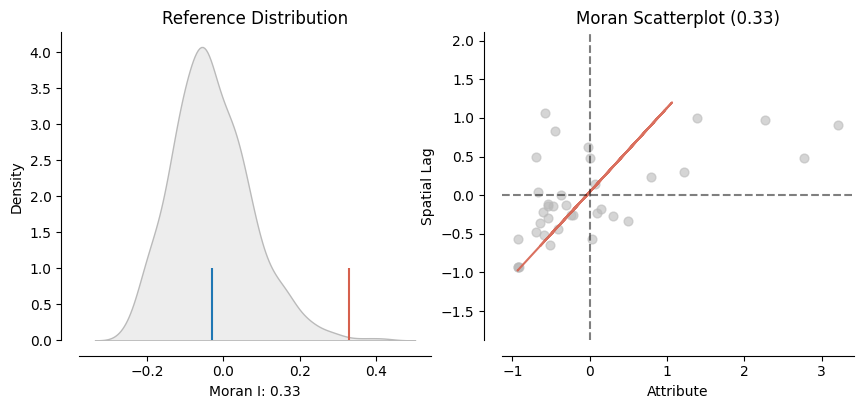

In [25]:
# Creating spatial weights based on Queen contiguity for 'tampere_region_data' GeoDataFrame
spatial_weights = Queen.from_dataframe(tampere_region_data)

# Drop islands and reset the index for 'tampere_region_data'
tampere_region_data_no_islands = tampere_region_data.drop(spatial_weights.islands).reset_index(drop=True)
# Recreate the weights after dropping the islands
spatial_weights = Queen.from_dataframe(tampere_region_data_no_islands)

# Row standardize the weights
spatial_weights.transform = 'R'

# calculate Moran's I for population density in 'tampere_region_data_no_islands'
moran_i = Moran(tampere_region_data_no_islands['pop_density_km2'], spatial_weights)

# Print the global Moran's I value
print(f"Global Moran's I: {moran_i.I}")

# Create a Moran plot for 'tampere_region_data_no_islands'
plot_moran(moran_i, zstandard=True, figsize=(10, 4))


### Questions

*Sufficient description gives you 2 points allocated to problem 3*.

- Question 3.1: Based on your analysis, describe whether your data is spatially autocorrelated or not: Write a short summary of your findings (few sentences).

### Answers

Answer to the questions by adding text after the `Answer` bullet point.



#### Answer 3.1: 

The **Moran's I value of 0.328** suggests a moderate level of positive spatial autocorrelation in the Tampere region's students population density. This indicates that areas with similar population densities are more likely to be located near each other. The positive value implies a clustering pattern, where high-density regions are adjacent to other high-density areas, and the same holds for low-density regions. This spatial autocorrelation insight is valuable for urban planning, helping policymakers target specific areas for development and resource allocation more effectively within the Tampere region.

## Problem 4 - How long did it take? Optional feedback (1 point)

To help developing the exercises, and understanding the time that it took for you to finish the Exercise, please provide an estimate of how many hours you spent for doing this exercise?

 - I spent approximately this many hours: **6 HOURS**
 
In addition, if you would like to give any feedback about the exercise (optional), please provide it below:

 - My feedback: I find this assignment very interesting and easy. I did find few difficultes in some points but otherwise it was easy.